In [1]:
import numpy as np
import pandas as pd
import sklearn
import pickle
import matplotlib.pyplot as plt
import cv2

### Load all the models

In [5]:
haar=cv2.CascadeClassifier(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\model\haarcascade_frontalface_default.xml')
model_svm=pickle.load(open(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\model\model_svm.pickle',mode='rb'))
pca_models=pickle.load(open(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\model\pca_dict.pickle',mode='rb'))

In [7]:
model_pca=pca_models['pca']
mean_face_arr=pca_models['mean_face']

### create the pipeline

In [36]:
img=cv2.imread(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\test_images\getty_test.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=haar.detectMultiScale(gray,1.5,3)
predictions=[]
for x,y,w,h in faces:
    # cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi=gray[y:y+h,x:x+w]
    roi=roi/255.0
    if roi.shape[1]>100:
        roi_resize=cv2.resize(roi,(100,100),cv2.INTER_AREA)
    else:
        roi_resize=cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
    
    roi_reshape=roi_resize.reshape(1,10000)
    roi_mean=roi_reshape-mean_face_arr
    eigen_image=model_pca.transform(roi_mean)
    eig_image=model_pca.inverse_transform(eigen_image)

    results=model_svm.predict(eigen_image)
    prob_score=model_svm.predict_proba(eigen_image)
    prob_score_max=prob_score.max()

    text="%s :%d"%(results[0],prob_score_max*100)
    
    if results[0]=='male':
        color=(255,255,0)
    else:
        color=(255,0,255)
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color,-1)
    cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_PLAIN,3,(255,255,255),5)
    output={
        'roi':roi,
        'eig_image':eig_image,
        'prediction_name':results[0],
        'score':prob_score_max
    }        
    predictions.append(output)

In [37]:
predictions

[{'roi': array([[0.54117647, 0.56078431, 0.58823529, ..., 0.64313725, 0.63529412,
          0.63137255],
         [0.58431373, 0.6       , 0.61568627, ..., 0.62352941, 0.63137255,
          0.64313725],
         [0.59607843, 0.61568627, 0.63137255, ..., 0.61568627, 0.62352941,
          0.63137255],
         ...,
         [0.6       , 0.59607843, 0.58039216, ..., 0.9372549 , 0.93333333,
          0.93333333],
         [0.59607843, 0.59215686, 0.57647059, ..., 0.93333333, 0.93333333,
          0.93333333],
         [0.59215686, 0.58823529, 0.57647059, ..., 0.92941176, 0.92941176,
          0.93333333]], shape=(273, 273)),
  'eig_image': array([[0.16980452, 0.17182545, 0.18827409, ..., 0.33154286, 0.34127972,
          0.3384274 ]], shape=(1, 10000)),
  'prediction_name': 'male',
  'score': np.float64(0.9434849885859249)},
 {'roi': array([[0.6       , 0.60784314, 0.61960784, ..., 0.57254902, 0.57647059,
          0.58039216],
         [0.61568627, 0.61960784, 0.62352941, ..., 0.57254902,

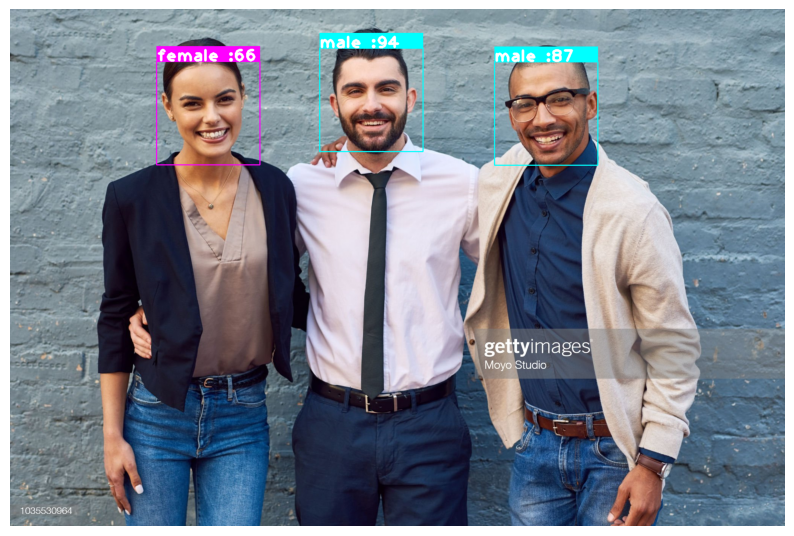

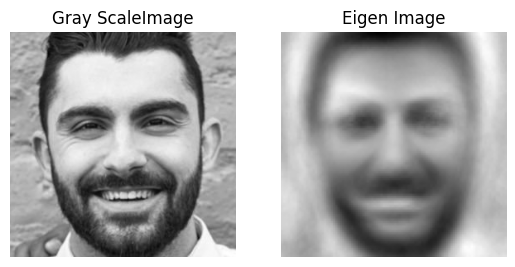

Prediction Gender = male
Prediction score =94.35 %
----------------------------------------------------------------------------------------------------


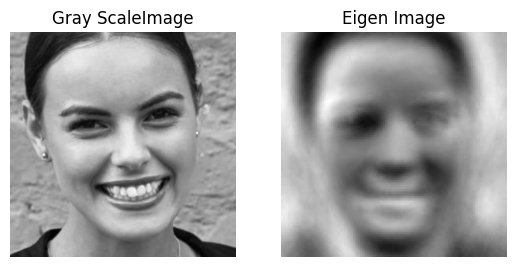

Prediction Gender = female
Prediction score =66.65 %
----------------------------------------------------------------------------------------------------


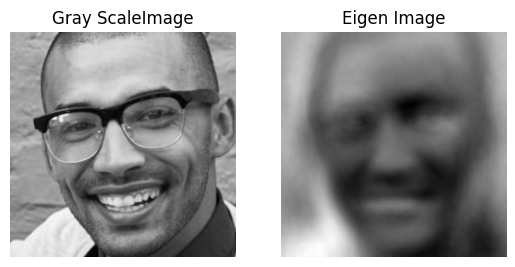

Prediction Gender = male
Prediction score =87.70 %
----------------------------------------------------------------------------------------------------


In [46]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## generate the report
for i in range(len(predictions)):
    obj_gray=predictions[i]['roi']
    obj_eig=predictions[i]['eig_image'].reshape(100,100)
    plt.subplot(1,2,1)
    plt.imshow(obj_gray, cmap='gray')
    plt.title('Gray ScaleImage')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig, cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    plt.show()
    print('Prediction Gender =', predictions[i]['prediction_name'])
    print('Prediction score ={:,.2f} %'.format(predictions[i]['score']*100))
    print('-'*100)